In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import linregress

In [2]:
# Load in file
file1 = "DataAnalyst.csv"

In [3]:
#Read and display the CSV with Pandas
data_df = pd.read_csv(file1)
data_df.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1


In [4]:
data=data_df.replace(-1,np.nan)
data=data_df.replace(-1.0,np.nan)
data=data_df.replace('-1',np.nan)
data

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN


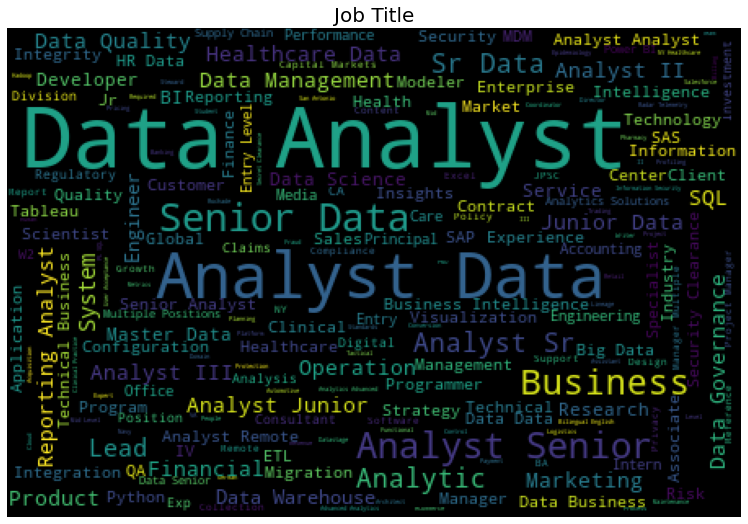

In [36]:
job_title=data['Job Title'][~pd.isnull(data['Job Title'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(job_title))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(data['Job Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

In [21]:
#Clean data: Remove Unnamed Column
smaller_data = data_df.drop(columns=['Unnamed: 0', 'Job Description', 'Headquarters', 'Size', 'Founded', 'Competitors', 'Easy Apply', 'Revenue' ])
smaller_data

,Job Title,Salary Estimate,Rating,Company Name,Location,Type of ownership,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY",Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",Nonprofit Organization,Health Care Services & Hospitals,Health Care
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace\n3.4,"New York, NY",Company - Private,Internet,Information Technology
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity\n4.1,"New York, NY",Subsidiary or Business Segment,IT Services,Information Technology
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel\n3.9,"New York, NY",Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation"
...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),2.5,"Avacend, Inc.\n2.5","Denver, CO",Company - Private,Staffing & Outsourcing,Business Services
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),2.9,Arrow Electronics\n2.9,"Centennial, CO",Company - Public,Wholesale,Business Services
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),-1.0,Spiceorb,"Denver, CO",-1,-1,-1
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),3.1,Contingent Network Services\n3.1,"Centennial, CO",Company - Private,Enterprise Software & Network Solutions,Information Technology


In [22]:
smaller_data['Rating'].unique()

array([ 3.2,  3.8,  3.4,  4.1,  3.9,  4.4,  3.7,  4. , -1. ,  3. ,  3.6,
        4.9,  3.3,  3.5,  5. ,  4.8,  4.7,  4.6,  2.9,  1. ,  3.1,  4.5,
        2.3,  4.2,  2.8,  4.3,  2.7,  2.5,  2.6,  2.4,  2. ,  2.1,  1.7,
        2.2,  1.8,  1.6,  1.9])

In [23]:
smaller_data['Rating'].value_counts()[:5]

-1.0    272
 3.9    140
 3.6    135
 3.7    132
 5.0    131
Name: Rating, dtype: int64

In [24]:
#Find the jobs with the highest paid salary, in top rated companies!
indexed_smaller_df = smaller_data.set_index('Rating').sort_values(["Rating"], ascending=[False])

indexed_smaller_df

,Job Title,Salary Estimate,Company Name,Location,Type of ownership,Industry,Sector
Rating,,,,,,,
5.0,Junior Data Analyst,$50K-$86K (Glassdoor est.),"Staffigo Technical Services, LLC\n5.0","Charlotte, NC",Company - Private,IT Services,Information Technology
5.0,Senior Data Analyst- Secret Clearance,$49K-$112K (Glassdoor est.),Counter Threat Solutions\n5.0,"Norfolk, VA",Company - Private,Consulting,Business Services
5.0,"Operations Analyst, Data Governance",$42K-$66K (Glassdoor est.),WB Technology\n5.0,"Burbank, CA",Company - Private,-1,-1
5.0,Data Analyst,$57K-$67K (Glassdoor est.),"Edison Software, Inc.\n5.0","Denver, CO",Company - Private,Computer Hardware & Software,Information Technology
5.0,Data Analyst,$37K-$70K (Glassdoor est.),Tilde Staff Inc.\n5.0,"Pasadena, CA",Company - Private,-1,-1
...,...,...,...,...,...,...,...
-1.0,DATA Analyst-Remote,$99K-$178K (Glassdoor est.),SGA Inc.,"San Francisco, CA",Company - Private,Architectural & Engineering Services,Business Services
-1.0,Data Analyst,$37K-$70K (Glassdoor est.),Kharon,"Los Angeles, CA",Company - Public,-1,-1
-1.0,Data Analyst,$37K-$70K (Glassdoor est.),NextDeavor Services,"Carson, CA",-1,-1,-1


In [25]:
rating_5 = smaller_data[(smaller_data["Rating"] >=4.0 and = 5.0)].sort_values(["Salary Estimate"], ascending=[False])
rating_5


SyntaxError: invalid syntax (<ipython-input-25-c73b8d51f1ee>, line 1)

In [26]:
rating_4 = smaller_data[(smaller_data["Rating"] == 4.0)].sort_values(["Salary Estimate"], ascending=[False])
rating_4

,Job Title,Salary Estimate,Rating,Company Name,Location,Type of ownership,Industry,Sector
1917,Operations Data Analyst,$99K-$178K (Glassdoor est.),4.0,Coinbase\n4.0,"San Francisco, CA",Company - Private,Internet,Information Technology
1933,Clinical Data Analyst,$99K-$178K (Glassdoor est.),4.0,Flatiron Health\n4.0,"San Francisco, CA",Company - Private,Enterprise Software & Network Solutions,Information Technology
1941,Senior Data Analyst,$99K-$178K (Glassdoor est.),4.0,Twitter\n4.0,"San Francisco, CA",Company - Public,Internet,Information Technology
398,Data Quality Management Analyst,$98K-$114K (Glassdoor est.),4.0,Reliable Software Resources\n4.0,"New York, NY",Company - Private,IT Services,Information Technology
370,Data Analyst with Data Lineage/Rochade,$98K-$114K (Glassdoor est.),4.0,Reliable Software Resources\n4.0,"Florham Park, NJ",Company - Private,IT Services,Information Technology
...,...,...,...,...,...,...,...,...
690,Business Analyst Asset Data Management,$113K-$132K (Glassdoor est.),4.0,NRC INC\n4.0,"Los Angeles, CA",Company - Private,-1,-1
1471,Data Analyst,$110K-$190K (Glassdoor est.),4.0,LeanData\n4.0,"Santa Clara, CA",Company - Private,Enterprise Software & Network Solutions,Information Technology
1478,Data Analyst,$110K-$190K (Glassdoor est.),4.0,Connor Group\n4.0,"Santa Clara, CA",Company - Private,Accounting,Accounting & Legal
1481,Tableau Data Analyst Intern,$110K-$190K (Glassdoor est.),4.0,Cognoa\n4.0,"Palo Alto, CA",Company - Private,Health Care Services & Hospitals,Health Care


In [27]:
#Is there correlation between rating and salary offered by the company ?(in Python)

In [28]:
#What are the top 3 essential skills employers are looking for as a data analyst?